In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 300)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("MCI_data2014_2019_multiclass.csv")

In [3]:
df.head()

,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
0,2014,24,83,1,132,-79.199081,43.800281,55.5,10.5,17.3,43794,16960,0.387268,29573,4948,0,0,0,0
1,2014,27,270,16,76,-79.386383,43.662472,56.2,10.2,12.6,25797,17505,0.678567,56526,14097,1,1,1,1
2,2014,24,83,6,1,-79.612595,43.720406,58.0,9.6,17.4,33312,13425,0.403008,31771,1117,1,0,0,0
3,2014,24,83,15,47,-79.349121,43.782772,55.1,9.6,15.8,27051,15035,0.555802,37379,6441,1,0,0,2
4,2014,3,123,2,90,-79.458778,43.664490,69.9,5.6,6.7,14366,7790,0.542253,49709,5442,2,2,1,0


In [4]:
df.shape

(205321, 19)

In [8]:
# import sklearn packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import power_transform, StandardScaler

#import stats to verify the skewness in the data
from scipy import stats

#metric imports
from sklearn.metrics import silhouette_score

In [6]:
toronto_grouped_clustering = df

In [9]:
#Create two empty list and populate the value of inertia and silhouette score in them
distortions = []
silhouette = []
K = range(2,10)

for k in K:
    kmeanModel = KMeans(n_clusters= k, init='k-means++', random_state=0)
    kmeanModel.fit(toronto_grouped_clustering)
    #Elbow method
    distortions.append(kmeanModel.inertia_)
    #Silhouette score
    silhouette.append(silhouette_score(toronto_grouped_clustering, kmeanModel.labels_, metric = 'euclidean'))

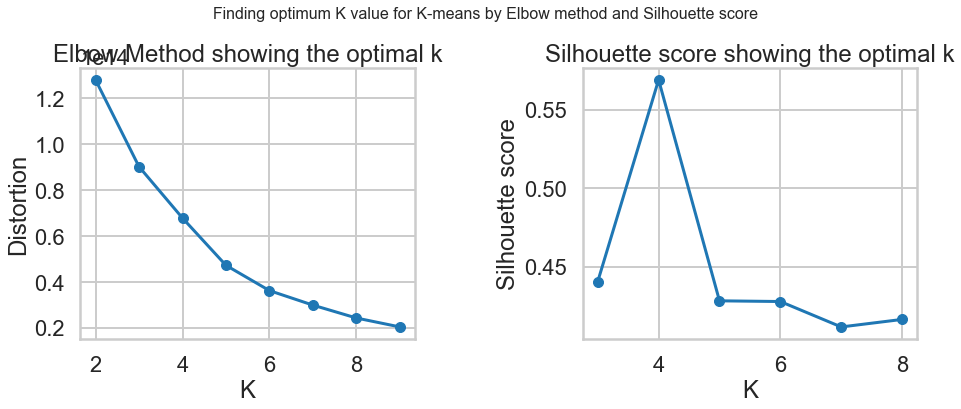

In [10]:
#plot graphs of Elbow method and Silhouette score
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].plot(K, distortions, marker='o', markersize=10)
axes[0].set(xlabel='K', ylabel='Distortion')
axes[0].set_title('Elbow Method showing the optimal k')

silhouetteTemp = []
axes[1].plot(range(3,9), silhouette[1:-1], marker='o', markersize=10)
axes[1].set(xlabel='K', ylabel='Silhouette score')
axes[1].set_title('Silhouette score showing the optimal k')


fig.suptitle('Finding optimum K value for K-means by Elbow method and Silhouette score', fontsize=16, y=1.05)
fig.subplots_adjust(wspace = 0.5)

##### Observations based on above graphs:

Using Elbow method, we can see that local optima can be found at K=5 or K=6.
Using Silhouette score, we got more confidence to select K=5 as the Silhouette score is highest at that point.
Hence, we will make 3 clusters in this process.

In [11]:
# set number of clusters
kclusters = 5



# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 0, 4, ..., 4, 4, 4])

In [14]:

# add clustering labels
df.insert(0, 'Cluster Labels', kmeans.labels_)


ValueError: cannot insert Cluster Labels, already exists

In [15]:
df.head(100)

,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
0,4,2014,24,83,1,132,-79.199081,43.800281,55.5,10.5,17.3,43794,16960,0.387268,29573,4948,0,0,0,0
1,0,2014,27,270,16,76,-79.386383,43.662472,56.2,10.2,12.6,25797,17505,0.678567,56526,14097,1,1,1,1
2,4,2014,24,83,6,1,-79.612595,43.720406,58.0,9.6,17.4,33312,13425,0.403008,31771,1117,1,0,0,0
3,4,2014,24,83,15,47,-79.349121,43.782772,55.1,9.6,15.8,27051,15035,0.555802,37379,6441,1,0,0,2
4,0,2014,3,123,2,90,-79.458778,43.664490,69.9,5.6,6.7,14366,7790,0.542253,49709,5442,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,2014,8,67,0,26,-79.510429,43.724773,56.8,7.9,18.8,35052,12305,0.351050,34168,2337,1,0,1,2
96,2,2014,8,98,14,95,-79.416115,43.664070,65.8,6.7,5.0,30526,20430,0.669266,112766,10863,0,5,5,0
97,4,2014,17,107,18,132,-79.225746,43.812221,55.5,10.5,17.3,43794,16960,0.387268,29573,4948,0,5,3,4
98,0,2014,24,114,11,68,-79.343094,43.668449,69.6,5.3,4.1,11916,6845,0.574438,73253,6770,2,5,3,0


In [25]:
df_Final = df
import folium as folium
from geopy.geocoders import Nominatim
import matplotlib.colors as colors

In [23]:

address = 'Toronto, Ontario, Canada'

geolocator = Nominatim(user_agent="Toronto_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Ontario, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Ontario, Canada are 43.6534817, -79.3839347.


In [29]:

#Initialize map
intializeMap = folium.Figure(height=400)

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10).add_to(intializeMap)

#convert the cluster from float to int
df_Final.dropna(inplace=True)
df_Final = df_Final.astype({"Cluster Labels": int})

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_Final['Lat'], 
                                  df_Final['Long'], 
                                  df_Final['Hood_ID'], 
                                  df_Final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto)



In [ ]:
map_toronto

In [33]:
#set the pandas option to show all the columns in the dataframe
pd.set_option('display.max_columns', None)

In [34]:
df_Final[df_Final['Cluster Labels'] == 0]

,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
1,0,2014,27,270,16,76,-79.386383,43.662472,56.2,10.2,12.6,25797,17505,0.678567,56526,14097,1,1,1,1
4,0,2014,3,123,2,90,-79.458778,43.664490,69.9,5.6,6.7,14366,7790,0.542253,49709,5442,2,2,1,0
6,0,2014,3,123,2,90,-79.458778,43.664490,69.9,5.6,6.7,14366,7790,0.542253,49709,5442,2,2,1,0
12,0,2014,17,48,0,90,-79.468620,43.665466,69.9,5.6,6.7,14366,7790,0.542253,49709,5442,0,4,0,4
16,0,2014,8,98,9,86,-79.436668,43.640587,66.9,6.7,9.4,14974,8060,0.538266,50580,9851,0,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205296,0,2019,17,351,19,14,-79.534058,43.619293,63.6,7.3,10.7,43965,24535,0.558058,52787,2712,4,11,5,0
205299,0,2019,17,351,19,14,-79.534058,43.619293,63.6,7.3,10.7,43965,24535,0.558058,52787,2712,4,11,5,0
205300,0,2019,17,351,19,14,-79.534058,43.619293,63.6,7.3,10.7,43965,24535,0.558058,52787,2712,4,11,5,0
205302,0,2019,23,357,9,82,-79.403229,43.645191,82.7,4.5,5.9,31180,23305,0.747434,70623,10156,4,11,0,4


In [42]:
df_Final[df_Final['Cluster Labels'] == 0].describe()


,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
count,67655.0,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000,67655.000000
mean,0.0,2016.638149,15.530397,187.236908,12.363151,64.875456,-79.402433,43.672480,64.393786,7.429754,8.500921,21991.681221,13206.183061,0.585865,55763.955377,9309.061148,0.879078,5.599778,3.018299,2.134299
std,0.0,1.710179,8.863834,103.323267,7.244623,27.749519,0.073241,0.040905,6.106510,1.429173,2.789665,8946.657292,6263.439105,0.080996,7195.459520,6183.838550,1.247469,3.441787,2.012008,1.491641
min,0.0,2014.000000,1.000000,1.000000,0.000000,8.000000,-79.610672,43.587093,51.300000,4.500000,2.600000,7607.000000,3760.000000,0.438893,44557.000000,2171.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2015.000000,8.000000,100.000000,6.000000,50.000000,-79.439041,43.651173,59.600000,6.500000,6.200000,14417.000000,8090.000000,0.518451,51181.000000,3981.000000,0.000000,3.000000,1.000000,1.000000
50%,0.0,2017.000000,16.000000,189.000000,13.000000,73.000000,-79.385857,43.661373,65.500000,7.200000,8.000000,21381.000000,11940.000000,0.582269,54324.000000,8038.000000,0.000000,6.000000,3.000000,2.000000
75%,0.0,2018.000000,23.000000,276.000000,19.000000,79.000000,-79.366692,43.684368,67.600000,8.500000,9.900000,27876.000000,17505.000000,0.642176,58071.000000,14097.000000,1.000000,9.000000,5.000000,4.000000
max,0.0,2019.000000,31.000000,366.000000,23.000000,140.000000,-79.136131,43.808510,82.700000,10.200000,16.800000,43965.000000,24535.000000,0.747434,76629.000000,23044.000000,4.000000,11.000000,6.000000,4.000000


In [35]:
df_Final[df_Final['Cluster Labels'] == 1]

,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
33,1,2014,18,138,18,98,-79.373108,43.682972,60.1,6.0,4.7,20923,14090,0.673422,207903,4500,0,2,4,3
57,1,2014,5,186,10,103,-79.410957,43.704086,63.1,7.5,3.6,15179,9510,0.626523,169203,4685,0,7,1,0
116,1,2014,18,108,10,98,-79.386787,43.670227,60.1,6.0,4.7,20923,14090,0.673422,207903,4500,1,5,6,0
121,1,2014,26,116,20,41,-79.381180,43.725376,53.6,8.0,1.5,9266,5635,0.608137,308010,1040,1,5,1,3
207,1,2014,22,53,19,41,-79.383621,43.720032,53.6,8.0,1.5,9266,5635,0.608137,308010,1040,1,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205145,1,2019,15,196,21,103,-79.403175,43.723991,63.1,7.5,3.6,15179,9510,0.626523,169203,4685,4,7,0,4
205151,1,2019,15,196,21,103,-79.403175,43.723991,63.1,7.5,3.6,15179,9510,0.626523,169203,4685,4,7,0,4
205218,1,2019,12,224,19,98,-79.386146,43.683567,60.1,6.0,4.7,20923,14090,0.673422,207903,4500,4,9,0,3
205252,1,2019,13,317,23,103,-79.397881,43.724277,63.1,7.5,3.6,15179,9510,0.626523,169203,4685,4,10,2,3


In [51]:
df_Final[df_Final['Cluster Labels'] == 1].describe()

,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
count,3424.0,3424.000000,3424.00000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000,3424.000000
mean,1.0,2016.729264,15.72868,188.663259,13.292640,89.794100,-79.396772,43.696828,60.254614,6.625701,3.735806,15125.336449,9933.392231,0.651991,210656.254381,4118.528329,1.162967,5.677570,3.123540,2.289428
std,0.0,1.729944,8.63204,104.595369,6.913107,21.627594,0.015300,0.021716,3.176138,0.862508,1.105817,4822.915402,3399.613476,0.026700,46417.770303,1416.276203,1.290323,3.460644,2.035813,1.301719
min,1.0,2014.000000,1.00000,1.000000,0.000000,41.000000,-79.425560,43.670227,53.600000,5.600000,1.500000,9266.000000,5635.000000,0.608137,165047.000000,1040.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,2015.000000,9.00000,98.750000,9.000000,96.000000,-79.412163,43.679564,60.100000,6.000000,3.400000,10732.000000,6990.000000,0.626523,169203.000000,4380.000000,0.000000,3.000000,1.000000,1.000000
50%,1.0,2017.000000,16.00000,192.000000,15.000000,98.000000,-79.393707,43.688408,60.100000,6.000000,4.300000,15179.000000,9510.000000,0.673422,207903.000000,4500.000000,1.000000,6.000000,3.000000,3.000000
75%,1.0,2018.000000,23.00000,282.000000,19.000000,101.000000,-79.384636,43.716682,62.800000,7.500000,4.700000,20923.000000,14090.000000,0.673422,207903.000000,4685.000000,1.000000,9.000000,5.000000,3.000000
max,1.0,2019.000000,31.00000,366.000000,23.000000,103.000000,-79.355278,43.748062,63.100000,8.000000,4.700000,20923.000000,14090.000000,0.680160,308010.000000,5683.000000,4.000000,11.000000,6.000000,4.000000


In [36]:
df_Final[df_Final['Cluster Labels'] == 2]

,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
26,2,2014,11,131,2,39,-79.419411,43.732395,60.3,5.5,7.2,23236,12765,0.549363,123077,4209,1,2,4,0
42,2,2014,12,102,13,95,-79.405975,43.675110,65.8,6.7,5.0,30526,20430,0.669266,112766,10863,0,5,1,0
43,2,2014,12,102,13,95,-79.405975,43.675110,65.8,6.7,5.0,30526,20430,0.669266,112766,10863,0,5,1,0
44,2,2014,12,102,13,95,-79.405975,43.675110,65.8,6.7,5.0,30526,20430,0.669266,112766,10863,0,5,1,0
66,2,2014,22,81,20,100,-79.398682,43.708214,68.2,6.9,6.1,11817,7990,0.676145,89330,7162,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205260,2,2019,13,317,22,40,-79.397362,43.755772,56.3,8.3,7.0,17812,10465,0.587525,100516,2430,4,10,2,3
205267,2,2019,23,327,1,39,-79.407944,43.737835,60.3,5.5,7.2,23236,12765,0.549363,123077,4209,4,10,1,3
205268,2,2019,23,327,1,39,-79.407944,43.737835,60.3,5.5,7.2,23236,12765,0.549363,123077,4209,4,10,1,3
205270,2,2019,23,327,21,40,-79.378593,43.763119,56.3,8.3,7.0,17812,10465,0.587525,100516,2430,4,10,1,3


In [52]:
df_Final[df_Final['Cluster Labels'] == 2].describe()

,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
count,11309.0,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.00000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000
mean,2.0,2016.643824,15.667345,187.445663,12.749315,67.861438,-79.409625,43.694623,63.700619,6.60252,5.597418,20087.299231,12465.362543,0.614461,107292.284198,6501.784862,1.180476,5.616058,3.031214,2.229021
std,0.0,1.734432,8.790483,104.397221,7.195820,33.301280,0.059852,0.030047,3.697708,0.77374,2.544264,7221.581282,5086.655371,0.050406,14685.071548,3203.988175,1.345335,3.441164,2.028275,1.400163
min,2.0,2014.000000,1.000000,1.000000,0.000000,9.000000,-79.560799,43.646381,56.300000,5.50000,1.400000,9271.000000,5735.000000,0.526231,85099.000000,2138.000000,0.000000,0.000000,0.000000,0.000000
25%,2.0,2015.000000,8.000000,101.000000,7.000000,39.000000,-79.421646,43.670227,60.300000,6.00000,3.800000,12806.000000,8175.000000,0.587117,92580.000000,3596.000000,0.000000,3.000000,1.000000,1.000000
50%,2.0,2017.000000,16.000000,186.000000,14.000000,95.000000,-79.402138,43.682339,65.700000,6.70000,5.000000,17812.000000,10475.000000,0.591181,111730.000000,6058.000000,1.000000,6.000000,3.000000,3.000000
75%,2.0,2018.000000,23.000000,281.000000,19.000000,95.000000,-79.389336,43.713600,65.800000,6.90000,7.000000,30526.000000,20430.000000,0.669266,112766.000000,10863.000000,2.000000,9.000000,5.000000,3.000000
max,2.0,2019.000000,31.000000,366.000000,23.000000,105.000000,-79.281219,43.765034,68.200000,8.30000,14.200000,30526.000000,20430.000000,0.704023,144642.000000,10863.000000,4.000000,11.000000,6.000000,4.000000


In [37]:
df_Final[df_Final['Cluster Labels'] == 3]

,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
14,3,2014,17,48,3,77,-79.367813,43.644344,78.2,5.2,7.2,65913,51740,0.784974,70600,8943,0,4,0,0
31,3,2014,17,137,9,77,-79.396378,43.648766,78.2,5.2,7.2,65913,51740,0.784974,70600,8943,0,2,1,0
35,3,2014,30,89,3,77,-79.388718,43.643971,78.2,5.2,7.2,65913,51740,0.784974,70600,8943,0,0,4,4
36,3,2014,30,89,3,77,-79.388718,43.643971,78.2,5.2,7.2,65913,51740,0.784974,70600,8943,0,0,4,4
37,3,2014,30,89,3,77,-79.388718,43.643971,78.2,5.2,7.2,65913,51740,0.784974,70600,8943,0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204966,3,2019,24,267,23,77,-79.391891,43.637653,78.2,5.2,7.2,65913,51740,0.784974,70600,8943,4,1,5,4
205011,3,2019,5,186,13,77,-79.373314,43.647259,78.2,5.2,7.2,65913,51740,0.784974,70600,8943,4,7,6,4
205015,3,2019,6,126,5,77,-79.398659,43.647476,78.2,5.2,7.2,65913,51740,0.784974,70600,8943,4,2,0,4
205169,3,2019,4,216,1,77,-79.400093,43.644455,78.2,5.2,7.2,65913,51740,0.784974,70600,8943,4,9,4,4


In [41]:
df_Final[df_Final['Cluster Labels'] == 3].describe()


,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
count,9598.0,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000
mean,3.0,2016.675766,15.623255,188.606897,10.688373,71.877474,-79.391344,43.669720,73.806449,5.850167,8.559439,62863.324130,47978.884143,0.757865,65620.511148,9168.391123,0.707752,5.643051,3.024588,2.031673
std,0.0,1.677903,8.882065,102.769138,8.034668,10.341979,0.012767,0.049785,8.870236,1.312636,2.744602,6157.057706,7593.399548,0.054730,10053.199590,455.047097,1.134915,3.435029,1.980635,1.611681
min,3.0,2014.000000,1.000000,1.000000,0.000000,51.000000,-79.415573,43.613026,55.900000,5.200000,7.200000,50434.000000,32650.000000,0.647381,45326.000000,8943.000000,0.000000,0.000000,0.000000,0.000000
25%,3.0,2015.000000,8.000000,103.000000,2.000000,77.000000,-79.399826,43.643929,78.200000,5.200000,7.200000,65913.000000,51740.000000,0.784974,70600.000000,8943.000000,0.000000,3.000000,1.000000,0.000000
50%,3.0,2017.000000,16.000000,193.000000,11.000000,77.000000,-79.392860,43.646473,78.200000,5.200000,7.200000,65913.000000,51740.000000,0.784974,70600.000000,8943.000000,0.000000,6.000000,3.000000,2.000000
75%,3.0,2018.000000,23.000000,275.750000,18.000000,77.000000,-79.383682,43.649460,78.200000,5.200000,7.200000,65913.000000,51740.000000,0.784974,70600.000000,8943.000000,1.000000,9.000000,5.000000,4.000000
max,3.0,2019.000000,31.000000,366.000000,23.000000,77.000000,-79.346962,43.784351,78.200000,8.500000,14.100000,65913.000000,51740.000000,0.784974,70600.000000,10087.000000,4.000000,11.000000,6.000000,4.000000


In [38]:
df_Final[df_Final['Cluster Labels'] == 4]

,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
0,4,2014,24,83,1,132,-79.199081,43.800281,55.5,10.5,17.3,43794,16960,0.387268,29573,4948,0,0,0,0
2,4,2014,24,83,6,1,-79.612595,43.720406,58.0,9.6,17.4,33312,13425,0.403008,31771,1117,1,0,0,0
3,4,2014,24,83,15,47,-79.349121,43.782772,55.1,9.6,15.8,27051,15035,0.555802,37379,6441,1,0,0,2
5,4,2014,26,85,15,136,-79.173927,43.771160,51.7,11.6,12.1,27392,10965,0.400299,33323,2856,0,0,2,2
7,4,2014,26,85,15,110,-79.473915,43.690422,54.7,8.6,13.1,11058,3115,0.281697,33316,6467,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205315,4,2019,24,358,23,1,-79.611534,43.732121,58.0,9.6,17.4,33312,13425,0.403008,31771,1117,4,11,5,3
205316,4,2019,24,358,4,1,-79.611320,43.710690,58.0,9.6,17.4,33312,13425,0.403008,31771,1117,4,11,5,4
205318,4,2019,24,358,19,74,-79.375420,43.671280,60.4,10.4,22.8,18615,10230,0.549557,32648,44321,4,11,5,4
205319,4,2019,24,358,0,30,-79.497994,43.700653,57.1,10.0,22.0,17757,5925,0.333671,32483,5045,4,11,5,1


In [40]:
df_Final[df_Final['Cluster Labels'] == 4].describe()


,Cluster Labels,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Hood_ID,Long,Lat,Employment rate,Unemployment rate,Unsuitable rate,population,Postsecondary,Postsecondary rate,income,density,target,month,day,premise_type
count,113335.0,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000,113335.000000
mean,4.0,2016.575277,15.531186,185.817214,12.825376,76.519328,-79.389428,43.732890,55.218826,9.721446,16.923947,24896.454087,10149.492081,0.408827,33743.158706,5701.173459,1.022976,5.561371,3.010191,2.246482
std,0.0,1.713319,8.909926,103.944886,7.094484,48.506790,0.126705,0.046930,4.227452,1.516038,5.719893,10388.815878,4426.050678,0.070978,4327.392403,5615.758845,1.401510,3.448914,2.012462,1.420562
min,4.0,2014.000000,1.000000,1.000000,0.000000,1.000000,-79.639267,43.593952,47.300000,6.000000,6.300000,6577.000000,2135.000000,0.246354,25989.000000,1117.000000,0.000000,0.000000,0.000000,0.000000
25%,4.0,2015.000000,8.000000,98.000000,8.000000,27.000000,-79.502014,43.699242,51.900000,8.700000,12.600000,17123.000000,6800.000000,0.373639,30878.000000,2856.000000,0.000000,2.000000,1.000000,1.000000
50%,4.0,2017.000000,16.000000,187.000000,14.000000,83.000000,-79.397644,43.736404,55.500000,9.600000,16.600000,23757.000000,9935.000000,0.404427,32997.000000,4414.000000,0.000000,6.000000,3.000000,2.000000
75%,4.0,2018.000000,23.000000,276.000000,19.000000,124.000000,-79.277595,43.767654,57.500000,10.600000,20.000000,30491.000000,12305.000000,0.447744,36232.000000,7031.000000,2.000000,9.000000,5.000000,4.000000
max,4.0,2019.000000,31.000000,366.000000,23.000000,139.000000,-79.123100,43.850788,67.100000,14.600000,42.200000,53485.000000,21370.000000,0.587038,44718.000000,44321.000000,4.000000,11.000000,6.000000,4.000000
